Convolutional Neural Network by Marlo Esperson


Raytheon Advisors: David Detienne and Kerry Courtright

Faculty Advisor: Alex Orange

Team Members: Josh Miraglia, Ryan Procarione, and Erik Graham

Last Update: 11.18.2021

The purpose of this program is to take in labeled generated signal data (bandwidth, center frequency, and signal-to-noise ratio (SNR)) from a Massive MIMO antenna and use it to train and test a convolutional neural network model that will be able to estimate bandwidth, center frequency, and SNR parameters.


Read in all signal data and labels:

In [1]:
#plotting function
%matplotlib notebook

In [2]:
# import numpy as np
# import h5py
# import matplotlib.pyplot as plt
# import os

# spec = 2048

# M = 9999 # number of signals

# with h5py.File("NNdataset.h5", "r") as f:
#     folders = f.keys()
#     #print("Folders in base: ", folders)
    
#     L = f.get('labels') #Retrieves the "labels" folder.
#     S = f.get('signals') #Retrieves "signals" folder.
    
#     data = np.array(S.get('rx_signals'))
#     dataset = data[0,0,:,:] #Sets the last two dimensions of the 4 dimensional array as the main 
#                             #dataset
   

#     print(L.keys())
#     #print(dataset.shape)
#     bandwidth = np.array(L.get('bandwidth'))
#     centers = np.array(L.get('center_freq')) #TODO: include frequency in name
#     SNR = np.array(L.get('SNR'))


<KeysViewHDF5 ['SNR', 'bandwidth', 'center_freq', 'end_index', 'modulation', 'start_index']>


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

spec = 2048

M = 29999 # number of signals

filein = "/local/2048_Angles_First.h5"
#filein = "/mnt/nndataset/SOUNDER_storepath/Anechoic_Data.h5"

with h5py.File(filein, "r") as f:
    folders = f.keys()
    #print("Folders in base: ", folders)
 

    #L = f.get('labels') #Retrieves the "labels" folder.
    #S = f.get('signals') #Retrieves "signals" folder.
    #print(f('dataset').keys())
    
    #Access generated data:
    data = f.get('generated_data')
    #signal_data = data.get('dataset')
    signal_data = data.get('signal_1')
    gen_sigs = np.array(signal_data)
    print(data.keys())

    
    #data = np.array(S.get('rx_signals'))
    #dataset = data[0,0,:,:] #Sets the last two dimensions of the 4 dimensional array as the main 
                            #dataset
   

    #print(L.keys())
    #print(dataset.shape)
    #bandwidth = np.array(L.get('bandwidth'))
    #centers = np.array(L.get('center_freq')) #TODO: include frequency in name
    #SNR = np.array(L.get('SNR'))
    
    bandwidth = np.array(data.get('bandwidths'))
    centers = np.array(data.get('centers'))
    start = np.array(data.get('starts'))
    stop = np.array(data.get('stops'))
    

<KeysViewHDF5 ['angles', 'bandwidths', 'centers', 'mods', 'signal_0', 'signal_1', 'starts', 'stops']>


# Move bandwidth labeled data into an array:

In [3]:

print(bandwidth[0:100])

[0.7169802 0.4155568 0.3947706 0.6541704 0.6336556 0.7549404 0.8662746
 0.8548934 0.46091   0.7086784 0.8848366 0.8546428 0.7185704 0.7625748
 0.2425308 0.281678  0.7711416 0.4612338 0.3638494 0.5555548 0.58814
 0.8111324 0.7489872 0.8264496 0.1484738 0.612306  0.7045478 0.4552022
 0.1729592 0.1306366 0.5145476 0.4611102 0.498249  0.2812358 0.7713936
 0.839939  0.4907508 0.2014836 0.636154  0.2676036 0.7589668 0.6070022
 0.5273686 0.280329  0.519343  0.175659  0.476017  0.8967204 0.3902764
 0.4707174 0.7830136 0.6116014 0.1076468 0.4827694 0.6548622 0.8472638
 0.6199848 0.5137802 0.274419  0.142675  0.1924622 0.6211234 0.2272264
 0.256888  0.414764  0.7227122 0.4202686 0.4950864 0.7095196 0.5912762
 0.570747  0.162056  0.412277  0.351006  0.7471448 0.7581736 0.3451234
 0.749653  0.198722  0.8276172 0.276461  0.5867446 0.8238436 0.3289206
 0.3133708 0.2157584 0.5892964 0.767287  0.6935018 0.3717132 0.879654
 0.6491056 0.166439  0.8063474 0.6776756 0.7659034 0.2546386 0.4486812
 0.156248

<IPython.core.display.Javascript object>


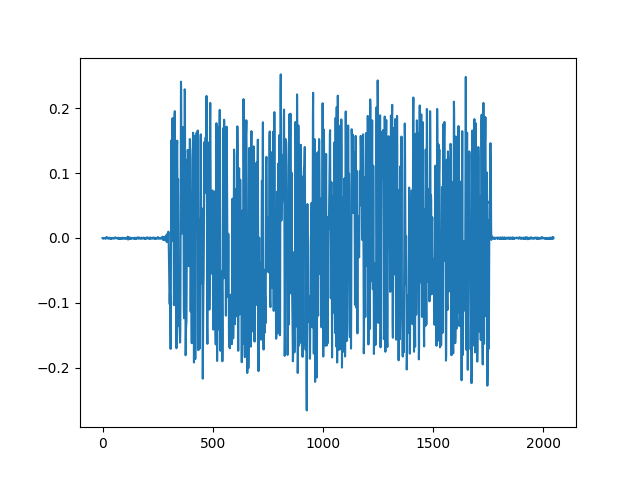

/users/MarloE/ve/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
plt.plot(dataset[1])


In [3]:
#dataset_fft = abs(np.fft.fftshift(np.fft.fft(dataset), (1,))) #Pass this into NN.
dataset_fft = abs(np.fft.fftshift(np.fft.fft(gen_sigs), (1,))) #Pass this into NN.

<IPython.core.display.Javascript object>


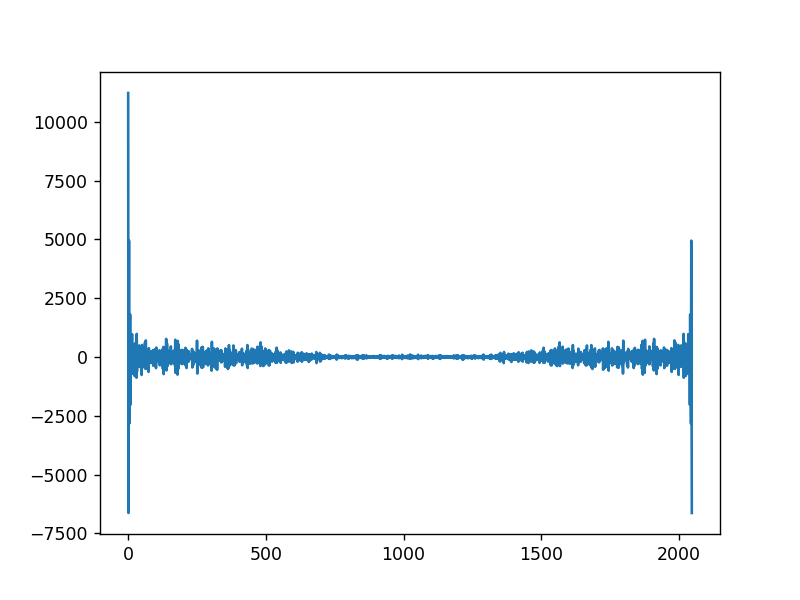

/local/dev/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
plt.figure()
#plt.plot((np.fft.fft(dataset))[0])
#plt.show()
plt.plot((np.fft.fft(dataset_fft))[0])
plt.show()

<IPython.core.display.Javascript object>


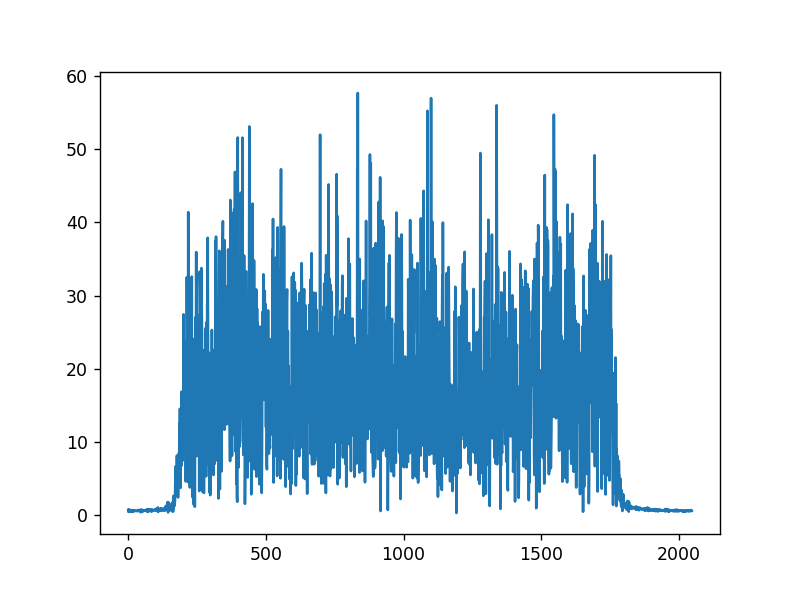

In [5]:
plt.figure()
plt.plot(dataset_fft[1])
plt.show()

Move center frequency labeled data into array:

In [8]:
#[1,2,3]*4

Move SNR labeled data into array:

In [9]:

#signal = dataset[M,:]
#x = np.linspace(0,2048,2048)

#print("test")
#print(dataset.shape)
#print(dataset.size())

    
#     G = f.get('dataset') #Retrieves "generated_data" file.
#     dataset = np.array(G.get('dataset')) #Retrieves contents of "dataset" folder
#     bandwidth = np.array(G.get('bandwidths')) #Retrieves contents of "bandwidths" folder
#     centers = np.array(G.get('center_freq')) #Retrieves "SNR" folder
#     #SNR = np.array(G.get('SNR'))    ????? Cannot upload NNDataset
#     signal = dataset[S,:]
#     x = np.linspace(0,2048,2048)

Signal Pre-Fourier Transform

In [10]:
#plt.plot(x,signal)
#plt.show() 

Signal Post-Fourier Transform

In [11]:
#plt.plot(np.abs(np.fft.fft(signal)))
#plt.show()

Splitting Dataset into Training and Testing Data

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
import sys
import h5py
import random
import datetime

#Casts a list indexing from 0 to 9999 for each labeled dataset
#Bandwidth
#print(len(bandwidth))
#idx_bw = list(range(len(bandwidth)))
#Center Frequency
idx_cf = list(range(len(centers)))
#Signal-to-Noise Ratio
#idx_SNR = list(range(len(SNR)))

#TODO: Ask Josh about 2-Dimensional Numpy Array

#Shuffles indices of bandwidth, center freq, and SNR datasets
#random.shuffle(idx_bw)
random.shuffle(idx_cf)
#random.shuffle(idx_SNR)

#Splitting datasets (8000 assigned to training and 2000 to testing)
#training_indices_bw, testing_indices_bw = np.split(idx_bw, [int(0.8*len(idx_bw))])

training_indices_cf, testing_indices_cf = np.split(idx_cf, [int(0.8*len(idx_cf))])
#training_indices_SNR, testing_indices_SNR = np.split(idx_SNR, [int(0.8*len(idx_SNR))])

#initializing testing and training data and label arrays
# training_data_bw = []
# training_labels_bw = []

# testing_data_bw = []
# testing_labels_bw = []

training_data_cf = []
training_labels_cf = []

testing_data_cf = []
testing_labels_cf = []

# training_data_SNR = []
# training_labels_SNR = []

# testing_data_SNR = []
# testing_labels_SNR = []

#fill up training dataset and the associated bandwidths (splitting here)
# for idx_bw in training_indices_bw:
#     #iterate through all indices and print
#     training_data_bw.append(dataset_fft[idx_bw])
#     training_labels_bw.append(bandwidth[idx_bw])
#     #print(idx)

#     #put bandwidth training_data and training_labels into a numpy array.
# training_data_bw = np.array(training_data_bw)
# training_labels_bw = np.array(training_labels_bw)
   
# for idx_bw in testing_indices_bw:
#     testing_data_bw.append(dataset_fft[idx_bw])
#     testing_labels_bw.append(bandwidth[idx_bw])


# testing_data_bw = np.array(testing_data_bw)
# testing_labels_bw = np.array(testing_labels_bw)


#fill up training dataset and the associated center frequency (splitting here)
for idx_cf in training_indices_cf:
    #iterate through all indices and print
    training_data_cf.append(dataset_fft[idx_cf])
    training_labels_cf.append(bandwidth[idx_cf])
    #print(idx)

    #put bandwidth training_data and training_labels into a numpy array.
training_data_cf = np.array(training_data_cf)
training_labels_cf = np.array(training_labels_cf)
   
for idx_cf in testing_indices_cf:
    testing_data_cf.append(dataset_fft[idx_cf])
    testing_labels_cf.append(centers[idx_cf])


testing_data_cf = np.array(testing_data_cf)
testing_labels_cf = np.array(testing_labels_cf)


# for idx_SNR in training_indices_SNR:
#     #iterate through all indices and print
#     training_data_SNR.append(dataset[idx_SNR])
#     training_labels_SNR.append(SNR[idx_SNR])
#     #print(idx)

#     #put bandwidth training_data and training_labels into a numpy array.
# training_data_SNR = np.array(training_data_SNR)
# training_labels_SNR = np.array(training_labels_SNR)
   
# for idx_SNR in testing_indices_SNR:
#     testing_data_SNR.append(dataset[idx_SNR])
#     testing_labels_SNR.append(SNR[idx_SNR])


# testing_data_SNR = np.array(testing_data_SNR)
# testing_labels_SNR = np.array(testing_labels_SNR)

Network Structure (Topology)

In [7]:
from tensorflow.keras.optimizers import Adam

input = tf.keras.layers.Input(shape = (2048, 1)) #2 dimensions
#Conv1D(number of kernels (try as few as 4 and go up by factors of 2, NoMachine?),
#length of the kernel (per discussion on board, try around 300), relu may not be the best, try other activation functions)
#50 represents the feature recognition (corners of the signal)
layer1 = Conv1D(10, 300, activation='relu')(input)  
layer2 = MaxPooling1D(pool_size = (2))(layer1) #Look into different kind of pooling layers.
#Layer that will look for features that will take 2048 points and narrow down and find the index
#around the maximum points and around the maximum.
#TODO: Email Johnathan and ask about pool size recommendations. Also any recommendations beyond a MaxPooling layer.
layer3 = Flatten()(layer2) #10240 outputs
layer4 = Dense(6000)(layer3)
layer5 = Dense(1000)(layer4)
layer6 = Dense(64)(layer5) 
layer7 = Dense(1)(layer6) #output layer

model = tf.keras.models.Model(inputs = input, outputs = layer7)
model.summary()

#TODO: Experiment with learning rate
#model.compile(optimizer = "adam", #Johnathan Wintrode
#             loss='mean_squared_error')

model.compile(optimizer=Adam(learning_rate = 0.00001),
             loss='mean_squared_error')
#accuracy = Number of correct predictions / total number of predictions made

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2048, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1749, 10)          3010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 874, 10)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8740)              0         
_________________________________________________________________
dense (Dense)                (None, 6000)              52446000  
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              6001000   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                64064 

Training the Network

In [8]:
#training, default batch size is 1/32 of the dataset
#TODO: increase epochs later to see differences in loss and val_loss
#history = model.fit(training_data, training_labels, epochs = 10, validation_data = (testing_data, testing_labels), callbacks=[tensorboard_callback])
# history = model.fit(training_data_bw, training_labels_bw, epochs = 9000, validation_data = (testing_data_bw, testing_labels_bw))
history = model.fit(training_data_cf, training_labels_cf, epochs = 320, validation_data = (testing_data_cf, testing_labels_cf))

#How many epochs to perform?

loss = model.evaluate(testing_data_bw, testing_labels_cf, batch_size=128)
print("test loss, test acc:", loss)
print(loss)
print(history.history)

#mean square
loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs = range(1,9)


#Root mean square
sqrt_loss = np.sqrt(loss)
sqrt_val_loss = np.sqrt(val_loss)

# plt.loglog(sqrt_loss, 'r', label='Training Loss')
# plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

Epoch 1/320
750/750 [==============================] - 92s 122ms/step - loss: 6.4400 - val_loss: 1.3995
Epoch 2/320
750/750 [==============================] - 91s 122ms/step - loss: 0.7671 - val_loss: 0.9492
Epoch 3/320
750/750 [==============================] - 91s 121ms/step - loss: 0.2878 - val_loss: 0.4936
Epoch 4/320
750/750 [==============================] - 91s 121ms/step - loss: 0.1434 - val_loss: 0.3864
Epoch 5/320
750/750 [==============================] - 91s 121ms/step - loss: 0.0916 - val_loss: 0.3868
Epoch 6/320
750/750 [==============================] - 91s 121ms/step - loss: 0.0749 - val_loss: 0.5903
Epoch 7/320
750/750 [==============================] - 91s 121ms/step - loss: 0.0654 - val_loss: 0.4109
Epoch 8/320
750/750 [==============================] - 91s 121ms/step - loss: 0.0473 - val_loss: 0.3421
Epoch 9/320
750/750 [==============================] - 91s 121ms/step - loss: 0.0286 - val_loss: 0.3146
Epoch 10/320
750/750 [==============================] - 91s 122m

750/750 [==============================] - 93s 124ms/step - loss: 0.0019 - val_loss: 0.2914
Epoch 80/320
750/750 [==============================] - 93s 124ms/step - loss: 0.0018 - val_loss: 0.3041
Epoch 81/320
750/750 [==============================] - 94s 125ms/step - loss: 0.0018 - val_loss: 0.2896
Epoch 82/320
750/750 [==============================] - 93s 125ms/step - loss: 0.0018 - val_loss: 0.2980
Epoch 83/320
750/750 [==============================] - 93s 125ms/step - loss: 0.0017 - val_loss: 0.2937
Epoch 84/320
750/750 [==============================] - 94s 125ms/step - loss: 0.0017 - val_loss: 0.2931
Epoch 85/320
750/750 [==============================] - 94s 125ms/step - loss: 0.0017 - val_loss: 0.2966
Epoch 86/320
750/750 [==============================] - 94s 125ms/step - loss: 0.0017 - val_loss: 0.2946
Epoch 87/320
750/750 [==============================] - 94s 125ms/step - loss: 0.0016 - val_loss: 0.2942
Epoch 88/320
750/750 [==============================] - 94s 125ms/st

750/750 [==============================] - 95s 126ms/step - loss: 7.6661e-04 - val_loss: 0.2941
Epoch 156/320
750/750 [==============================] - 94s 126ms/step - loss: 7.5595e-04 - val_loss: 0.2942
Epoch 157/320
750/750 [==============================] - 94s 126ms/step - loss: 7.4603e-04 - val_loss: 0.2906
Epoch 158/320
750/750 [==============================] - 94s 126ms/step - loss: 7.4462e-04 - val_loss: 0.2940
Epoch 159/320
750/750 [==============================] - 95s 126ms/step - loss: 7.2712e-04 - val_loss: 0.2942
Epoch 160/320
750/750 [==============================] - 95s 126ms/step - loss: 7.2214e-04 - val_loss: 0.2918
Epoch 161/320
750/750 [==============================] - 94s 126ms/step - loss: 7.2721e-04 - val_loss: 0.2993
Epoch 162/320
750/750 [==============================] - 95s 126ms/step - loss: 7.0929e-04 - val_loss: 0.2929
Epoch 163/320
750/750 [==============================] - 94s 126ms/step - loss: 6.9430e-04 - val_loss: 0.2965
Epoch 164/320
750/750 [=

750/750 [==============================] - 95s 127ms/step - loss: 3.1261e-04 - val_loss: 0.2961
Epoch 230/320
750/750 [==============================] - 95s 127ms/step - loss: 3.0738e-04 - val_loss: 0.2943
Epoch 231/320
750/750 [==============================] - 95s 126ms/step - loss: 3.0539e-04 - val_loss: 0.2888
Epoch 232/320
750/750 [==============================] - 95s 126ms/step - loss: 2.9965e-04 - val_loss: 0.2909
Epoch 233/320
750/750 [==============================] - 95s 127ms/step - loss: 2.9440e-04 - val_loss: 0.2907
Epoch 234/320
750/750 [==============================] - 95s 126ms/step - loss: 2.9228e-04 - val_loss: 0.2909
Epoch 235/320
750/750 [==============================] - 95s 127ms/step - loss: 2.8927e-04 - val_loss: 0.2977
Epoch 236/320
750/750 [==============================] - 94s 126ms/step - loss: 2.8210e-04 - val_loss: 0.2939
Epoch 237/320
750/750 [==============================] - 94s 126ms/step - loss: 2.8437e-04 - val_loss: 0.2922
Epoch 238/320
750/750 [=

750/750 [==============================] - 95s 127ms/step - loss: 1.2352e-04 - val_loss: 0.2929
Epoch 304/320
750/750 [==============================] - 95s 126ms/step - loss: 1.1993e-04 - val_loss: 0.2917
Epoch 305/320
750/750 [==============================] - 95s 127ms/step - loss: 1.1606e-04 - val_loss: 0.2908
Epoch 306/320
750/750 [==============================] - 95s 127ms/step - loss: 1.1484e-04 - val_loss: 0.2940
Epoch 307/320
750/750 [==============================] - 95s 126ms/step - loss: 1.1629e-04 - val_loss: 0.2934
Epoch 308/320
750/750 [==============================] - 95s 127ms/step - loss: 1.1461e-04 - val_loss: 0.2933
Epoch 309/320
750/750 [==============================] - 95s 127ms/step - loss: 1.1456e-04 - val_loss: 0.2904
Epoch 310/320
750/750 [==============================] - 95s 127ms/step - loss: 1.1493e-04 - val_loss: 0.2922
Epoch 311/320
750/750 [==============================] - 95s 126ms/step - loss: 1.0970e-04 - val_loss: 0.2908
Epoch 312/320
750/750 [=

NameError: name 'testing_data_bw' is not defined

47/47 [==============================] - 1s 23ms/step - loss: 0.2932
test loss, test acc: 0.2932344973087311
0.2932344973087311
{'loss': [6.439971923828125, 0.7671192288398743, 0.2878146469593048, 0.143401637673378, 0.09159515053033829, 0.07486137747764587, 0.06544823944568634, 0.04729141667485237, 0.028572527691721916, 0.021860159933567047, 0.016820251941680908, 0.0120301004499197, 0.010251302272081375, 0.008785730227828026, 0.008656234480440617, 0.008954601362347603, 0.008678165264427662, 0.008731139823794365, 0.009246764704585075, 0.009025059640407562, 0.009194421581923962, 0.009052164852619171, 0.008627149276435375, 0.00835457630455494, 0.00824691727757454, 0.0076155755668878555, 0.007204330526292324, 0.006951426155865192, 0.006768344435840845, 0.006538714282214642, 0.006314071826636791, 0.006110445596277714, 0.00581946549937129, 0.005533826071768999, 0.005357116926461458, 0.005157392006367445, 0.004932532086968422, 0.004848242271691561, 0.0046106320805847645, 0.004557447042316198,

<IPython.core.display.Javascript object>


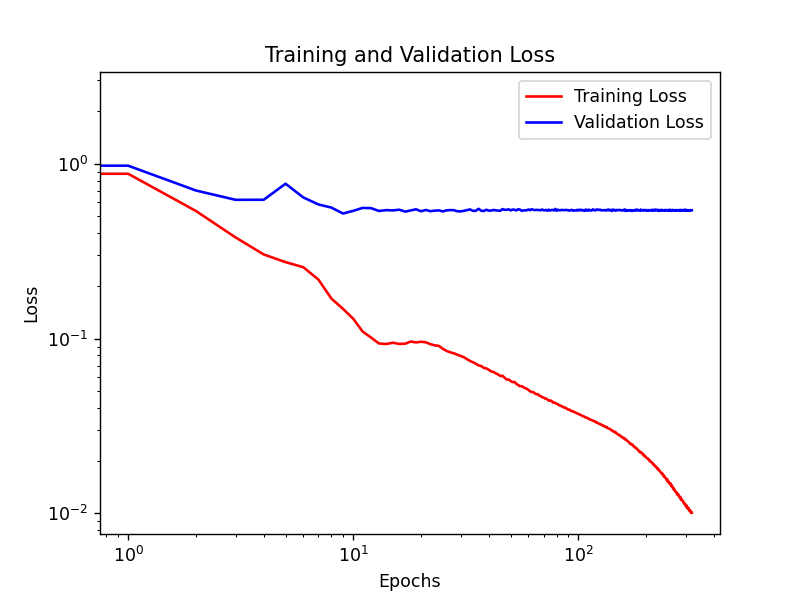

In [11]:

loss = model.evaluate(testing_data_cf, testing_labels_cf, batch_size=128)
print("test loss, test acc:", loss)
print(loss)
print(history.history)

#mean square
loss = history.history['loss']
val_loss = history.history['val_loss']
#epochs = range(1,9)

sqrt_loss = np.sqrt(loss)
sqrt_val_loss = np.sqrt(val_loss)

plt.figure()
plt.loglog(sqrt_loss, 'r', label='Training Loss')
plt.loglog(sqrt_val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#Random integer input for checking random indices.

random_index = random.randint(0,len(testing_labels_cf)-1)


predict_cf = model.predict(testing_data_cf)

print("Index:", random_index)
print("Model prediction:",predict_cf[random_index])
print("Actual center frequency:",testing_labels_cf[random_index])

Index: 3642
Model prediction: [0.15433374]
Actual center frequency: 0.1251198


In [64]:
print(testing_data_bw[638])
print(training_indices_bw[1673])


[0. 0. 0. ... 0. 0. 0.]
7501


In [65]:
model.save('model1.hdf5')